In [2]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch betweeb 'default' and 'ignore'

''' Set debug flag to view extended error messages; else set it to False to turn off debugging mode '''
debug = True

## Load and View Schema

In [3]:
import pandas as pd

_grp_book_df = pd.read_csv("/Users/thiaradealwis/Desktop/Workspace/Rezgate/sample_data/covid.csv")
_grp_book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51042 entries, 0 to 51041
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     51042 non-null  object 
 1   day                                                         51042 non-null  int64  
 2   month                                                       51042 non-null  int64  
 3   year                                                        51042 non-null  int64  
 4   cases                                                       51042 non-null  int64  
 5   deaths                                                      51042 non-null  int64  
 6   countriesAndTerritories                                     51042 non-null  object 
 7   geoId                                                       50818 non-null  object 
 

## Enrich the dataset

### Declare DataEnricment class

In [4]:
import sys
sys.path.insert(1, '../wrangler')
import enrich as en

if debug:
    import importlib
    en = importlib.reload(en)

data_name = "covid_cases"
cls_enrich = en.DataEnrichment(name=data_name)
print(dir(cls_enrich))
print(cls_enrich._aug_dict)

Initialing DataEnrichment class for  covid_cases
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_aug_dict', '_cols_to_augment_dict', '_date_col_name', '_kwargs', 'get_DD', 'get_DOW', 'get_MM', 'get_MMM', 'get_MMM_DD', 'get_YYYY', 'get_dt_augmentations', 'get_enriched_data', 'name', 'set_imputation', 'set_multi_currency']
{'DateTime': ['ALL', 'DOW', 'YYYY', 'YY', 'MMM', 'MM', 'MMM-DD']}


# Plot time series by year

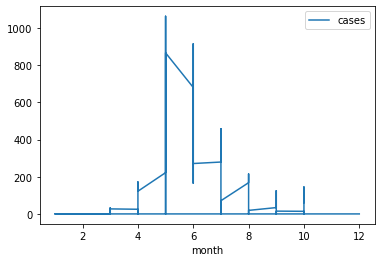

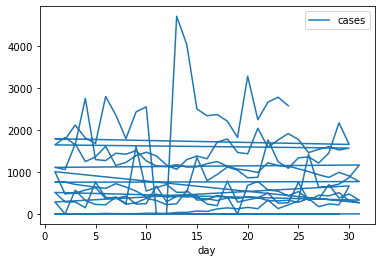

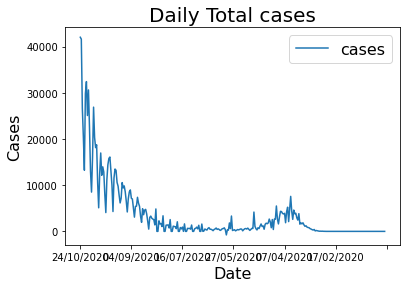

In [6]:
''' Plot the individual year time series'''

''' change y_var to view the desired time series '''
afghanistan = _grp_book_df[_grp_book_df['countriesAndTerritories'] == 'Afghanistan']
canada = _grp_book_df[_grp_book_df['countriesAndTerritories'] == 'Canada']
france = _grp_book_df[_grp_book_df['countriesAndTerritories'] == 'France']

  # set the dependent variable (e.g. RoomNights, AgentCost)

x_var = 'cases'

ax = afghanistan.plot('month', x_var) 
ax = canada.plot('day', x_var)
ax = france.plot('dateRep', x_var) 


ax.set_title("Daily Total cases", fontsize=20)
ax.set_xlabel("Date",fontsize=16)
ax.set_ylabel("Cases", fontsize=16)
ax.legend(fontsize=16)